# Data Modeling and Analysis

This Notebook will model the data and gather insights. This will include:
- Data Exploration
- Data Visualization
- Conclusions


Notes to self:



## Import Data

In [106]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## NLTK
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## WordCloud
from wordcloud import WordCloud


#Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [72]:
df = pd.read_csv('../3_ANALYSIS/data/processed_data.csv')

print(df.shape)
df.head()

(2727, 73)


,subreddit,selftext,title,link_flair_richtext,subreddit_name_prefixed,upvote_ratio,ups,score,edited,is_self,...,domain_self.USMC,domain_self.army,domain_self.bipolar,domain_self.schizophrenia,domain_stripes.com,domain_v.redd.it,domain_youtu.be,domain_youtube.com,hour_of_day,day_of_week
0,Army,This was a convo I had with one of my buddies ...,If you could create a new MRE based on a Fast ...,[],r/army,0.673935,-0.263955,-0.263955,0,1,...,0,1,0,0,0,0,0,0,23,5
1,Army,BLUF: how do you overcome imposter syndrome?\n...,how do you even Army?,[],r/army,-1.607424,-0.290761,-0.290761,0,1,...,0,1,0,0,0,0,0,0,23,5
2,Army,"Long story short, my estranged (soon to be ex)...",Command Directed No-Contact Order?,[],r/army,0.673935,-0.277358,-0.277358,0,1,...,0,1,0,0,0,0,0,0,23,5
3,Army,"\nMy husband is 35T, and just graduated AIT. W...",Anyone 35T?,[],r/army,-0.174943,-0.250552,-0.250552,0,1,...,0,1,0,0,0,0,0,0,22,5
4,Army,I could use some advice on going recruiting. I...,Thinking of going recruiter as brand new E5,[],r/army,0.673935,-0.277358,-0.277358,0,1,...,0,1,0,0,0,0,0,0,22,5


In [73]:
military_df = df[df['subreddit'].isin(['Army', 'USMC'])]

military_df.head()

,subreddit,selftext,title,link_flair_richtext,subreddit_name_prefixed,upvote_ratio,ups,score,edited,is_self,...,domain_self.USMC,domain_self.army,domain_self.bipolar,domain_self.schizophrenia,domain_stripes.com,domain_v.redd.it,domain_youtu.be,domain_youtube.com,hour_of_day,day_of_week
0,Army,This was a convo I had with one of my buddies ...,If you could create a new MRE based on a Fast ...,[],r/army,0.673935,-0.263955,-0.263955,0,1,...,0,1,0,0,0,0,0,0,23,5
1,Army,BLUF: how do you overcome imposter syndrome?\n...,how do you even Army?,[],r/army,-1.607424,-0.290761,-0.290761,0,1,...,0,1,0,0,0,0,0,0,23,5
2,Army,"Long story short, my estranged (soon to be ex)...",Command Directed No-Contact Order?,[],r/army,0.673935,-0.277358,-0.277358,0,1,...,0,1,0,0,0,0,0,0,23,5
3,Army,"\nMy husband is 35T, and just graduated AIT. W...",Anyone 35T?,[],r/army,-0.174943,-0.250552,-0.250552,0,1,...,0,1,0,0,0,0,0,0,22,5
4,Army,I could use some advice on going recruiting. I...,Thinking of going recruiter as brand new E5,[],r/army,0.673935,-0.277358,-0.277358,0,1,...,0,1,0,0,0,0,0,0,22,5


In [74]:
#Downloading NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyerafrancis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kyerafrancis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [75]:
def preprocess_text(text):
    '''
    This function is performing text cleaning in order to prepare the text for NLP analysis.
    This includes:
    - Lowercasing
    - Removing special characters and digits
    - Tokenizing into words
    - Removing stopwords
    - Lemmatization
    
    Returns: Cleaned text
    
    '''
    # Lowercasing
    text = text.lower()
    # Remove special characters and digits
    text = re.sub("(\\d|\\W)+", " ", text)
    # Tokenize into words
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words("english", "ascii"))
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)


In [76]:
def prepare_data_for_nlp(df, text_column='selftext', target_column='subreddit'):
    ''' 
    This function is performing text preprocessing and vectorization for NLP analysis.
    
    Parameters:
    - df: dataframe
    - text_column: column containing text data
    - target_column: column containing target variable
    
    
    Returns: X_train_vect, X_test_vect, y_train, y_test, vectorizer
    '''
    # Preprocess text data
    df[text_column] = df[text_column].apply(lambda x: preprocess_text(str(x)))

    # Split dataset into features and target variable
    X = df[text_column]
    y = df[target_column]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorization - using TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)

    return X_train_vect, X_test_vect, y_train, y_test, vectorizer

In [77]:
X_train, X_test, y_train, y_test, vectorizer = prepare_data_for_nlp(military_df)

## Reviewing Aggregate Word Cloud

In [78]:
tdidf_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
print(tdidf_df)

       _a  _flu  _pubs  _req  _ss  _to_  aaffj  aaslt   ab   ability  ...  \
0     0.0   0.0    0.0   0.0  0.0   0.0    0.0    0.0  0.0  0.000000  ...   
1     0.0   0.0    0.0   0.0  0.0   0.0    0.0    0.0  0.0  0.000000  ...   
2     0.0   0.0    0.0   0.0  0.0   0.0    0.0    0.0  0.0  0.000000  ...   
3     0.0   0.0    0.0   0.0  0.0   0.0    0.0    0.0  0.0  0.000000  ...   
4     0.0   0.0    0.0   0.0  0.0   0.0    0.0    0.0  0.0  0.000000  ...   
...   ...   ...    ...   ...  ...   ...    ...    ...  ...       ...  ...   
1111  0.0   0.0    0.0   0.0  0.0   0.0    0.0    0.0  0.0  0.000000  ...   
1112  0.0   0.0    0.0   0.0  0.0   0.0    0.0    0.0  0.0  0.000000  ...   
1113  0.0   0.0    0.0   0.0  0.0   0.0    0.0    0.0  0.0  0.000000  ...   
1114  0.0   0.0    0.0   0.0  0.0   0.0    0.0    0.0  0.0  0.061091  ...   
1115  0.0   0.0    0.0   0.0  0.0   0.0    0.0    0.0  0.0  0.000000  ...   

      zmzlbgjsb  zone  ztgwlwjjnwyty  zti  zwm  zwqtc  zwyzltqwmjmtyjmyzi  

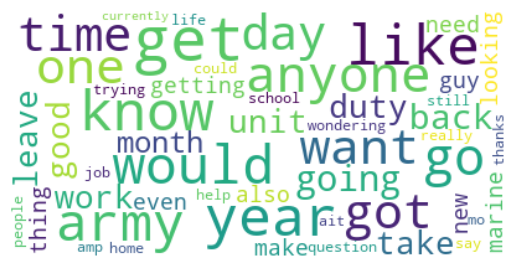

In [79]:
# Sum the TF-IDF scores for each word
word_frequencies = tdidf_df.sum(axis=0).to_dict()

# Generate WordCloud
wordcloud = WordCloud(background_color='white', max_words=50, max_font_size=50, random_state=42).generate_from_frequencies(word_frequencies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Training for Logistical Regression Model

In [80]:
# Initialize the model
lrg = LogisticRegression()

# Train the model
lrg.fit(X_train, y_train)


LogisticRegression()

              precision    recall  f1-score   support

        Army       0.75      1.00      0.86       201
        USMC       1.00      0.15      0.27        78

    accuracy                           0.76       279
   macro avg       0.88      0.58      0.56       279
weighted avg       0.82      0.76      0.69       279



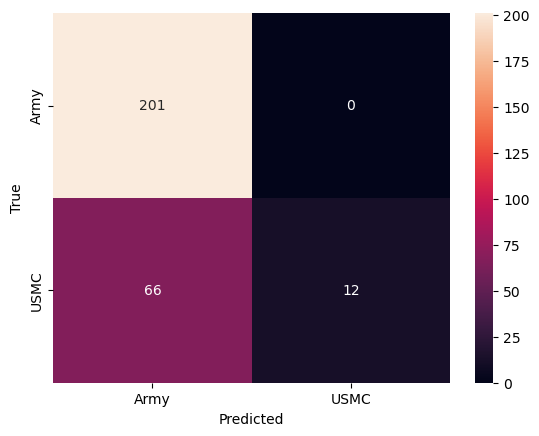

In [96]:
# Make predictions on the test set
y_pred_lr = lrg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_lr)) #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

# Plot confusion matrix
cm_lrg = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lrg, 
            annot=True,
            fmt='d',
            xticklabels=['Army', 'USMC'],
            yticklabels=['Army', 'USMC'],)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [82]:
# Define parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2', 'elasticnet', None],
    'max_iter': [100, 200, 300],
    'class_weight': ['balanced', None],
    'random_state': [42],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'n_jobs': [-1]}

# Initialize Grid Search
grid_search = GridSearchCV(LogisticRegression(),
                           param_grid,
                           cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Re-evaluate with the best parameters
best_model = grid_search.best_estimator_
y_pred_best_lr = best_model.predict(X_test)


/Users/kyerafrancis/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kyerafrancis/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

C                 0.1
class_weight     None
max_iter          100
multi_class      auto
n_jobs             -1
penalty          None
random_state       42
solver          lbfgs
dtype: object

              precision    recall  f1-score   support

        Army       0.85      0.90      0.87       201
        USMC       0.70      0.59      0.64        78

    accuracy                           0.81       279
   macro avg       0.77      0.75      0.76       279
weighted avg       0.81      0.81      0.81       279



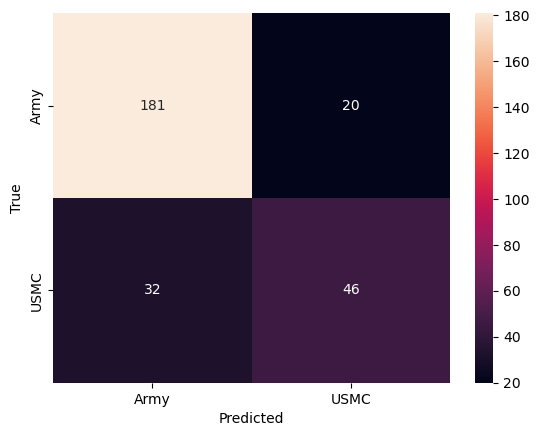

In [83]:
# Print best parameters
print(pd.Series(grid_search.best_params_))
print()
# Print classification report
print(classification_report(y_test, y_pred_best_lr))

# Plot confusion matrix
cm_lrg_best = confusion_matrix(y_test, y_pred_best_lr)
sns.heatmap(cm_lrg_best,
            annot=True,
            fmt='d', 
            xticklabels=['Army', 'USMC'],
            yticklabels=['Army', 'USMC'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [98]:
# Variables 
feature_names = vectorizer.get_feature_names_out()
coefficients = lrg.coef_[0] #Becuase this is a binary classification problem, there are only 2 classes. Therefore, we only need to look at the first row of coefficients.

for _, class_label in enumerate(lrg.classes_): #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    sorted_indices = np.argsort(coefficients)

    top_positive_words = [feature_names[i] for i in sorted_indices[-20:]]
    top_negative_words = [feature_names[i] for i in sorted_indices[:20]]

    print(f"Class: {class_label}")
    print("Top Positive Influential Words:", top_positive_words)
    print("Top Negative Influential Words:", top_negative_words)
    print()

Class: Army
Top Positive Influential Words: ['fleet', 'package', 'shit', 'miss', 'safe', 'said', 'www', 'worst', 'device', 'think', 'got', 'base', 'order', 'semper', 'guy', 'issued', 'usmc', 'devil', 'corp', 'marine']
Top Negative Influential Words: ['army', 'ait', 'soldier', 'job', 'fort', 'get', 'year', 'basic', 'station', 'mo', 'recruiter', 'issue', 'date', 'school', 'take', 'hbl', 'time', 'people', 'ets', 'going']

Class: USMC
Top Positive Influential Words: ['fleet', 'package', 'shit', 'miss', 'safe', 'said', 'www', 'worst', 'device', 'think', 'got', 'base', 'order', 'semper', 'guy', 'issued', 'usmc', 'devil', 'corp', 'marine']
Top Negative Influential Words: ['army', 'ait', 'soldier', 'job', 'fort', 'get', 'year', 'basic', 'station', 'mo', 'recruiter', 'issue', 'date', 'school', 'take', 'hbl', 'time', 'people', 'ets', 'going']



### Word Clouds for Positive and Negative Posts

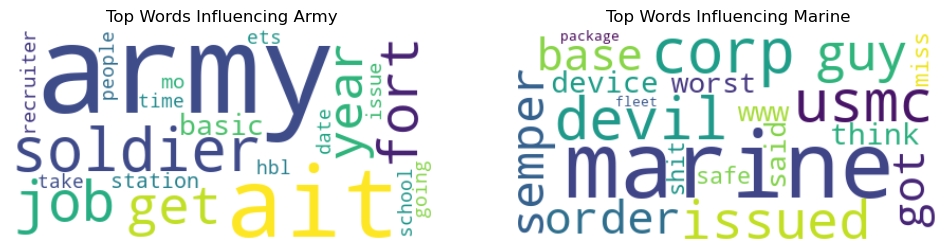

In [85]:
# For Class A (Positive Coefficients)
top_words_marine = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[-20:]}

# For Class B (Negative Coefficients)
top_words_army = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[:20]}

# Word Cloud for Class A
wordcloud_army = WordCloud(background_color='white').generate_from_frequencies(top_words_army)

# Word Cloud for Class B
wordcloud_marine = WordCloud(background_color='white').generate_from_frequencies(top_words_marine)

# Display Word Clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_army, interpolation='bilinear')
plt.title('Top Words Influencing Army')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_marine, interpolation='bilinear')
plt.title('Top Words Influencing Marine')
plt.axis("off")

plt.show()

## Training for Naive Bayes Regression Model

In [86]:
# Initialize and train the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

              precision    recall  f1-score   support

        Army       0.72      1.00      0.84       201
        USMC       1.00      0.01      0.03        78

    accuracy                           0.72       279
   macro avg       0.86      0.51      0.43       279
weighted avg       0.80      0.72      0.61       279



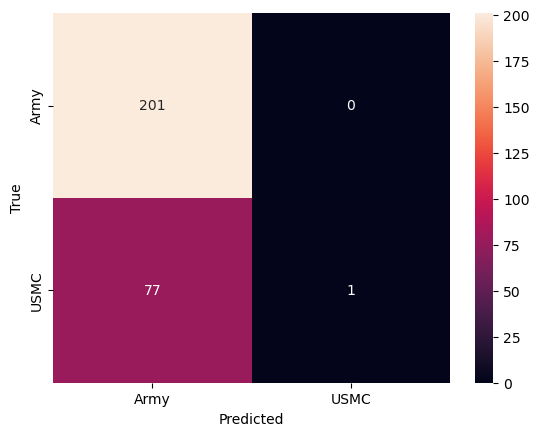

In [99]:
# Predict on the test set
y_pred_mnb = mnb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_mnb))

# Plot the confusion matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(cm_mnb,
            annot=True,
            fmt='d',
            xticklabels=['Army', 'USMC'],
            yticklabels=['Army', 'USMC'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [90]:
# Define a parameter grid for GridSearch
param_grid_mnb = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]],
    }

# Initialize and perform the grid search
grid_search_mnb = GridSearchCV(MultinomialNB(), param_grid = param_grid_mnb, cv=5)
grid_search_mnb.fit(X_train, y_train)



# Re-evaluate using the best model
best_model = grid_search_mnb.best_estimator_
y_pred_best_mnb = best_model.predict(X_test)


Best Parameters:  {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': None, 'random_state': 42, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

        Army       0.78      0.98      0.87       201
        USMC       0.86      0.31      0.45        78

    accuracy                           0.79       279
   macro avg       0.82      0.64      0.66       279
weighted avg       0.81      0.79      0.75       279



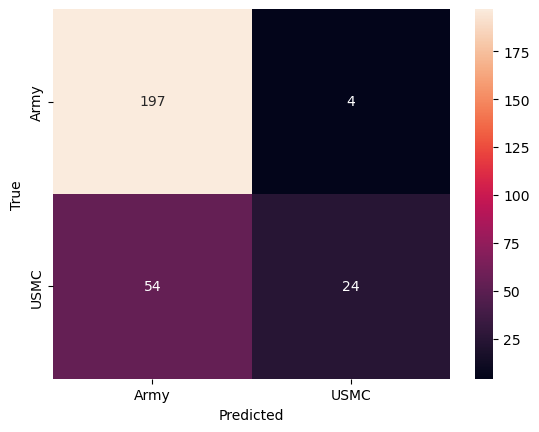

In [93]:
# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

#Print classification report
print(classification_report(y_test, y_pred_best_mnb))

# Plot the confusion matrix
cm_mnb_best = confusion_matrix(y_test, y_pred_best_mnb)
sns.heatmap(cm_mnb_best,
            annot=True,
            fmt='d',
            xticklabels=['Army', 'USMC'],
            yticklabels=['Army', 'USMC'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [92]:
# Variables 

log_prob = mnb.feature_log_prob_ #There are no coefficients in Multinomial Naive Bayes, instead we have log probabilities

for _, class_label in enumerate(mnb.classes_):
    class_log_probabilities = log_prob[_]
    sorted_indices = np.argsort(class_log_probabilities)

    top_words = [feature_names[i] for i in sorted_indices[-20:]]  # Top 20 words

    print(f"Class: {class_label}")
    print("Top Influential Words:", top_words)
    print()

Class: Army
Top Influential Words: ['need', 'duty', 'back', 'leave', 'unit', 'take', 'got', 'one', 'going', 'anyone', 'day', 'time', 'want', 'go', 'would', 'like', 'know', 'year', 'army', 'get']

Class: USMC
Top Influential Words: ['month', 'think', 'day', 'amp', 'corp', 'want', 'work', 'good', 'back', 'year', 'know', 'guy', 'go', 'get', 'would', 'one', 'anyone', 'got', 'like', 'marine']



## Training for Random Forest Classifier Model

In [31]:
# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

        Army       0.78      0.98      0.87       201
        USMC       0.85      0.28      0.42        78

    accuracy                           0.78       279
   macro avg       0.81      0.63      0.65       279
weighted avg       0.80      0.78      0.74       279



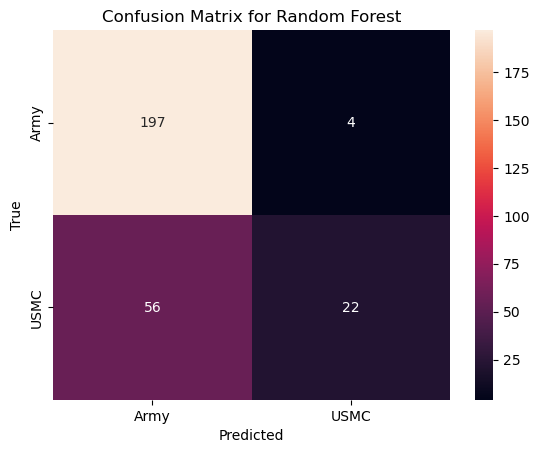

In [100]:
# Make predictions
y_pred_rf = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=['Army', 'USMC'], yticklabels=['Army', 'USMC'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [33]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features (Not separated by class)

top_features = [(feature_names[i], importances[i]) for i in indices]
print("Top Features and Words:")
for feature, importance in top_features:
    print(f"{feature}: {importance}")

Top Features and Words:
worst: 0.004021587111974313
said: 0.004117288607100224
looking: 0.004442656844595539
deployment: 0.0044527868987532145
ait: 0.00445925474442154
like: 0.004670984398275075
semper: 0.004919577203374839
back: 0.005160624473924585
guy: 0.005509774942505095
think: 0.005703866258035001
get: 0.005992855962215014
good: 0.0060573053502110995
issued: 0.006736213494319084
got: 0.007230854355482058
anyone: 0.007445601167462372
devil: 0.008361335551135352
usmc: 0.009487944540558513
army: 0.009564228075185872
corp: 0.012629173897437458
marine: 0.04672432548822209


In [94]:
# Define parameter grid for GridSearch
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Re-evaluate with the best parameters
best_model_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_model_rf.predict(X_test)

max_depth              NaN
min_samples_leaf       1.0
min_samples_split     10.0
n_estimators         200.0
dtype: float64

              precision    recall  f1-score   support

        Army       0.78      0.99      0.87       201
        USMC       0.88      0.27      0.41        78

    accuracy                           0.78       279
   macro avg       0.83      0.63      0.64       279
weighted avg       0.80      0.78      0.74       279



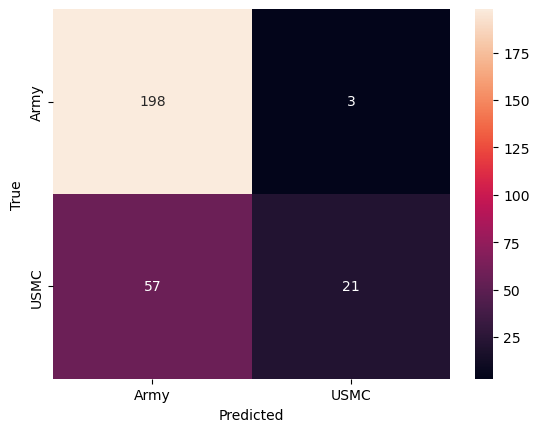

In [95]:
# Print best parameters
print(pd.Series(grid_search_rf.best_params_))
print()
# Print classification report
print(classification_report(y_test, y_pred_best_rf))

# Plot confusion matrix
cm_rf_best = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_rf_best,
            annot=True,
            fmt='d', 
            xticklabels=['Army', 'USMC'],
            yticklabels=['Army', 'USMC'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Training for KNN Model

In [34]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

        Army       0.72      1.00      0.84       201
        USMC       0.00      0.00      0.00        78

    accuracy                           0.72       279
   macro avg       0.36      0.50      0.42       279
weighted avg       0.52      0.72      0.60       279



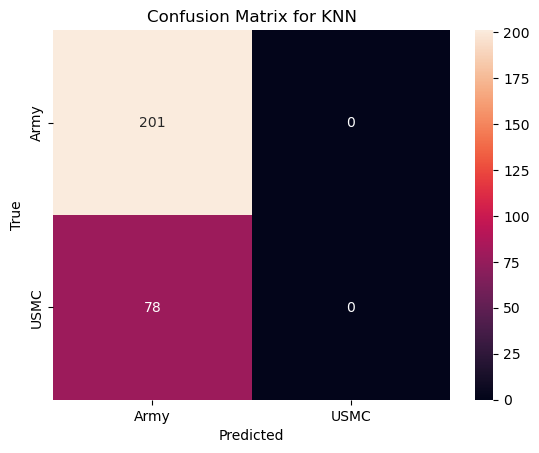

In [101]:
# Make predictions
y_pred_knn = knn.predict(X_test) 

# Print classification report
print(classification_report(y_test, y_pred_knn))

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=['Army', 'USMC'], yticklabels=['Army', 'USMC'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

As you can see if we process the KNN the same way as the other models, we get a very low accuracy score. This is because the KNN model is very sensitive to the scale of the data. We will need to scale the data before we can run the model.

In [108]:
# Scale the features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN model with GridSearch for parameter tuning
knn_params = {
    'n_neighbors': np.arange(1, 25),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_scaled = KNeighborsClassifier()
grid_search = GridSearchCV(knn_scaled, knn_params, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best KNN model
best_knn = grid_search.best_estimator_

Classification Report:
              precision    recall  f1-score   support

        Army       0.72      1.00      0.84       201
        USMC       1.00      0.01      0.03        78

    accuracy                           0.72       279
   macro avg       0.86      0.51      0.43       279
weighted avg       0.80      0.72      0.61       279

Accuracy: 0.7240143369175627


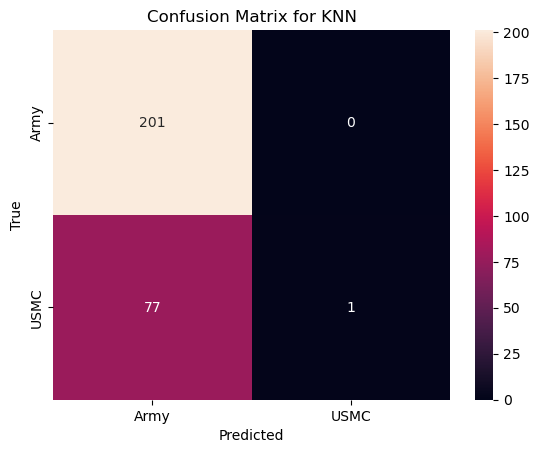

In [109]:
# Make predictions
y_pred_knn = best_knn.predict(X_test_scaled)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=['Army', 'USMC'], yticklabels=['Army', 'USMC'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()